<a href="https://colab.research.google.com/github/AcerPing/tcfst_ML_11C032/blob/main/Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
y_train
# 若一張圖片假設有馬又有鳥，則答案應為：[馬, 鳥]

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
print(y_train.shape)
# (50000, 1)：2D，表格，1行50000列
# (50000, )：1D，List

(50000, 1)


In [5]:
import random
idx = random.randint(0, 50000-1)
idx

7269

In [6]:
trans = ['airplane', 'automobile', 'bird',
        'cat', 'deer', 'dog', 'frog', 
         'horse', 'ship', 'truck']

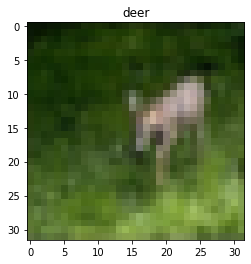

In [7]:
# 顯示圖片 → matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.title(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # 2D圖片
from keras.layers import Dense, Flatten, Dropout
cnn = Sequential()

# CNN Layer
cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3))) #3*3*3(1 filter)*64+64(bias)=1792
cnn.add(MaxPooling2D()) # 預設 pool_size=(2, 2)
cnn.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')) #3*3*64(1 filter)*128+128(bias)=73856
cnn.add(MaxPooling2D()) # 預設 pool_size=(2, 2)
cnn.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D()) # 預設 pool_size=(2, 2)

# MLP Layer
cnn.add(Flatten()) # 轉為一維，因為MLP須為1維。 (Flatten：將多維轉為1維。)
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [9]:
# 參數說明
# filters：過濾器要有幾個，即卷积中滤波器的输出数量。
# kernel_size：過濾器大小(Ex. 3*3)，指明 2D 卷积窗口的宽度和高度。
# strides：步長，指明卷积沿宽度和高度方向的步长。
# padding：卷積後保持圖片尺寸
# activation：要使用的激活函数，中間層選用'relu'。

In [10]:
# 處理圖片：Normalize（/255）
x_train_norm = x_train / 255
x_test_norm = x_test / 255
print(x_train_norm[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [11]:
# 處理答案：one-hot
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_test_cat = to_categorical(y_test)
y_test_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [13]:
print(y_train[0])
print(y_train_cat[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
# 訓練模型
cnn.compile(loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])
# metrics → 度量標準

In [15]:
cnn.fit(x_train_norm, y_train_cat, batch_size=200, epochs=10, validation_split=0.1, verbose=2)

Epoch 1/10
225/225 - 9s - loss: 1.5949 - accuracy: 0.4182 - val_loss: 1.2194 - val_accuracy: 0.5668 - 9s/epoch - 41ms/step
Epoch 2/10
225/225 - 4s - loss: 1.1381 - accuracy: 0.5965 - val_loss: 0.9741 - val_accuracy: 0.6614 - 4s/epoch - 17ms/step
Epoch 3/10
225/225 - 4s - loss: 0.9363 - accuracy: 0.6709 - val_loss: 0.8666 - val_accuracy: 0.7014 - 4s/epoch - 16ms/step
Epoch 4/10
225/225 - 4s - loss: 0.8041 - accuracy: 0.7168 - val_loss: 0.7793 - val_accuracy: 0.7328 - 4s/epoch - 16ms/step
Epoch 5/10
225/225 - 4s - loss: 0.7099 - accuracy: 0.7544 - val_loss: 0.7487 - val_accuracy: 0.7398 - 4s/epoch - 16ms/step
Epoch 6/10
225/225 - 4s - loss: 0.6225 - accuracy: 0.7818 - val_loss: 0.6781 - val_accuracy: 0.7708 - 4s/epoch - 16ms/step
Epoch 7/10
225/225 - 4s - loss: 0.5475 - accuracy: 0.8082 - val_loss: 0.7053 - val_accuracy: 0.7604 - 4s/epoch - 16ms/step
Epoch 8/10
225/225 - 4s - loss: 0.4717 - accuracy: 0.8342 - val_loss: 0.6871 - val_accuracy: 0.7702 - 4s/epoch - 16ms/step
Epoch 9/10
225/2

In [18]:
# 評估模型
cnn.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.7467 - accuracy: 0.7703


[0.7466895580291748, 0.7702999711036682]

In [30]:
# 衡量模型（）
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
'''
自 TensorFlow version 2.6.後沒有'predict_classes'功能
Keras AttributeError: 'Sequential' object has no attribute 'predict_classes'
model.predict_classes() is deprecated and will be removed after 2021-01-01.
 
Please use instead:* np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
(model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

reference: https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes
'''
pre = cnn.predict(x_test_norm) # 預測
pre = np.argmax(pre,axis=1)
i = ['{}(正確)'.format(i) for i in trans]
c = ['{}(預測)'.format(i) for i in trans]
pd.DataFrame(confusion_matrix(y_test, pre), index=i, columns=c)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),846,17,26,9,9,4,11,7,48,23
automobile(正確),17,896,6,7,3,6,7,0,19,39
bird(正確),79,5,681,33,64,56,50,17,11,4
cat(正確),32,10,75,550,58,174,52,18,18,13
deer(正確),24,4,79,38,742,33,42,28,8,2
dog(正確),17,3,46,116,38,719,21,28,8,4
frog(正確),8,7,47,35,24,24,846,4,5,0
horse(正確),14,7,49,38,72,55,5,748,3,9
ship(正確),58,23,5,8,4,7,4,1,880,10
truck(正確),35,91,12,14,2,10,5,11,25,795


In [35]:
print(pre.shape)
pre

(10000,)


array([3, 8, 8, ..., 5, 4, 7])

In [34]:
print(y_test.shape)
y_test

(10000, 1)


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [54]:
# 注意pre和y_test維度不同，所以需要reshape，變為1維才能比較。
y_test_1D = y_test.reshape(-1)
y_test_1D

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

預測錯誤：200


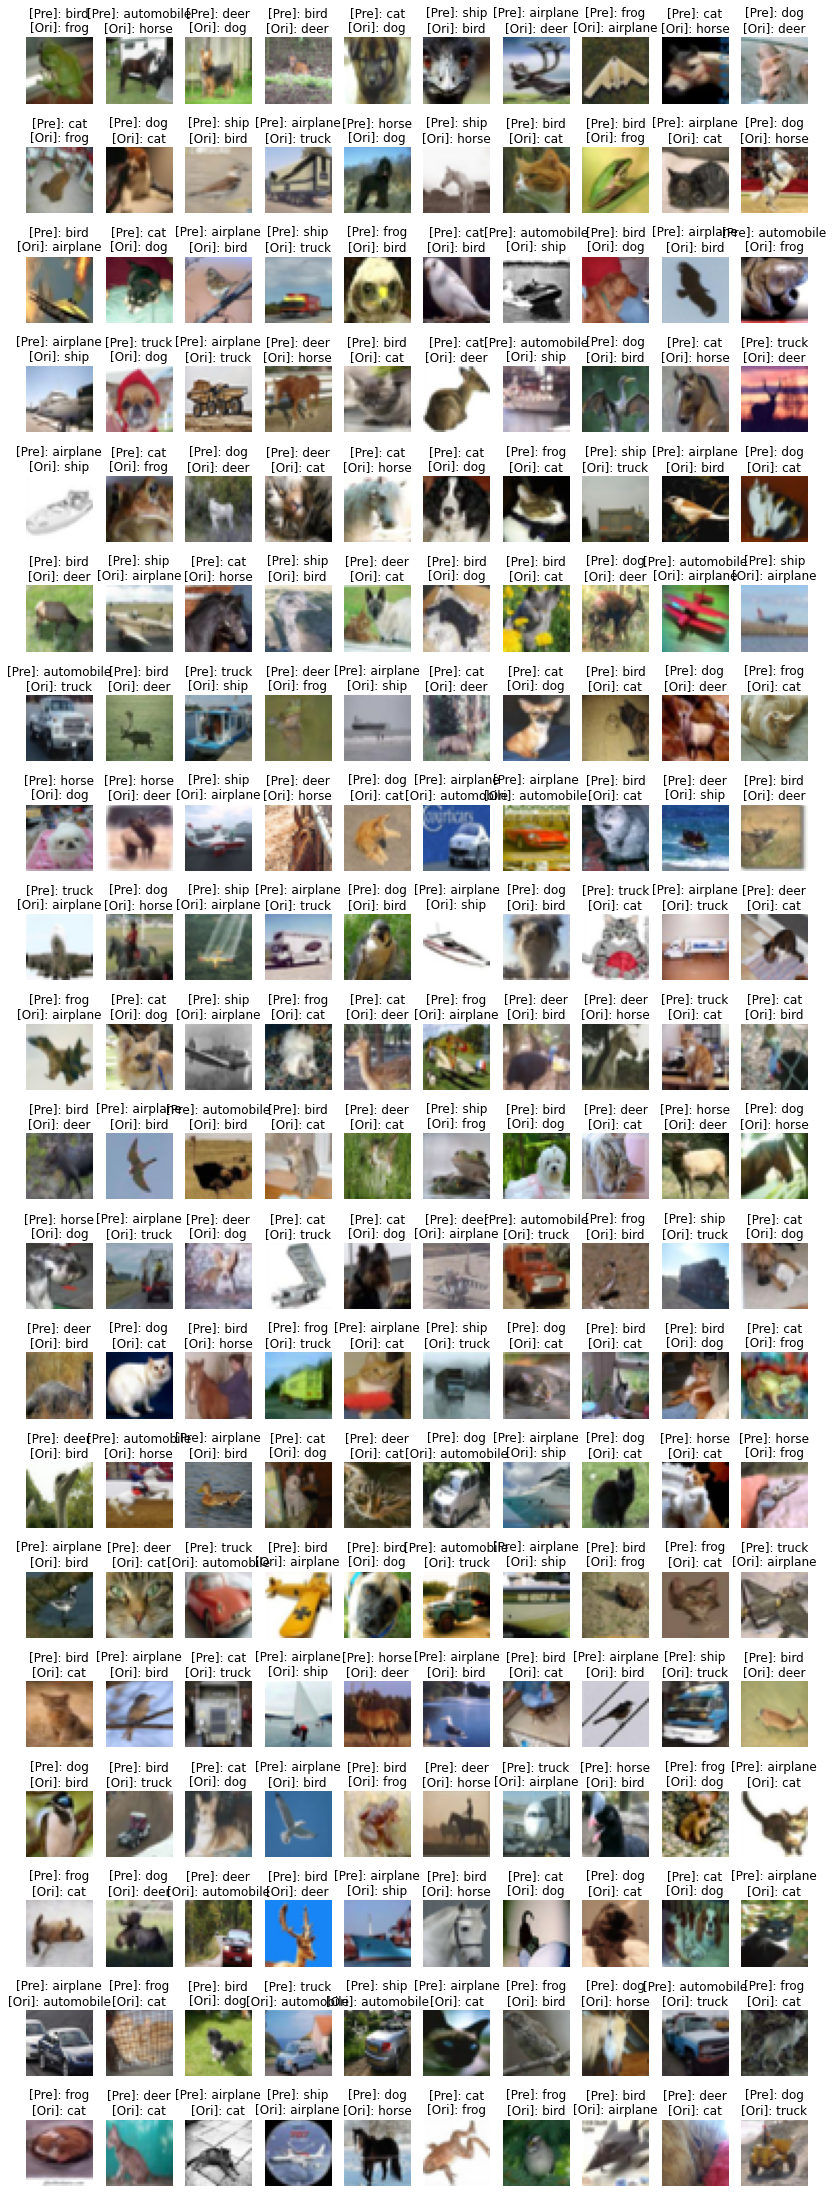

In [55]:
import numpy as np
# nonzero() → type為tuple，(1st索引, 2nd索引, 3rd索引...)
idx = np.nonzero(pre != y_test_1D)[0][:200] # 取前200筆
print('預測錯誤：' + str(len(idx)))

pre_false_img = x_test[idx]
pre_false_label = y_test_1D[idx]
pre_false_predict = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42)) # 寬、高

for i, img in enumerate(pre_false_img):
    plt.subplot(height, width, i+1)
    t = '[Pre]: {}\n[Ori]: {}'.format(trans[pre_false_predict[i]], trans[pre_false_label[i]])
    plt.title(t)
    plt.axis('off')
    plt.imshow(img) #彩色圖片